In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [92]:
file_path= os.path.join("world_ind_pop_data.csv")
df = pd.read_csv(file_path, header= 0)
print (df.head())

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  


In [89]:
f = os.path.join("messy_stock_data.tsv")
d = pd.read_csv(f, sep= " ", header=3, comment="#")

In [90]:
d.head()

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


In [52]:
d.loc[d.name== "IBM"]

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96


#    

## Time Series

In [63]:
time_format = "%Y-%m-%d %H:%M"
date_list= ['20100101 00:00', '20100101 01:00', '20100101 02:00', '20100101 03:00', 
            '20100501 04:00', '20100501 05:00','20100601 06:00', '20100101 07:00', 
            '20100101 08:00', '20100101 09:00', '20110101 10:00', '20110201 11:00']

my_datetimes= pd.to_datetime(date_list, format= time_format)

In [64]:
temprature_list= [46.2, 44.6, 44.1, 43.8, 
                  43.5, 43.0, 43.1, 42.3, 
                  42.5, 45.9, 49.4, 52.4]

series= pd.Series(temprature_list, my_datetimes)
print (series)

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-05-01 04:00:00    43.5
2010-05-01 05:00:00    43.0
2010-06-01 06:00:00    43.1
2010-01-01 07:00:00    42.3
2010-01-01 08:00:00    42.5
2010-01-01 09:00:00    45.9
2011-01-01 10:00:00    49.4
2011-02-01 11:00:00    52.4
dtype: float64


In [65]:
series["2010-01-01 00:00": "2010-01-01 04:00"]

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
dtype: float64

In [66]:
#print only the values in 2010 year
series["2010"]

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-05-01 04:00:00    43.5
2010-05-01 05:00:00    43.0
2010-06-01 06:00:00    43.1
2010-01-01 07:00:00    42.3
2010-01-01 08:00:00    42.5
2010-01-01 09:00:00    45.9
dtype: float64

In [67]:
series["May-2010"]

2010-05-01 04:00:00    43.5
2010-05-01 05:00:00    43.0
dtype: float64

In [68]:
series["May-01-2010"]

2010-05-01 04:00:00    43.5
2010-05-01 05:00:00    43.0
dtype: float64

In [72]:
date= ["2016-07-01","2016-07-04","2016-07-05"]
temp= [0,1,2]
ts2= pd.Series(temp, date)
ts2

2016-07-01    0
2016-07-04    1
2016-07-05    2
dtype: int64

In [73]:
ts1= ["2016-07-01","2016-07-02","2016-07-03"]
temp=[42,96,30]
ts1= pd.Series(temp, date)

In [75]:
ts3= ts2.reindex(ts1.index)
print (ts3)

2016-07-01    0
2016-07-04    1
2016-07-05    2
dtype: int64


In [95]:
file_path= os.path.join("weather_data_austin_2010.csv")
df= pd.read_csv(file_path, parse_dates=True, index_col="Date")
print (df.head())

                     Temperature  DewPoint  Pressure
Date                                                
2010-01-01 00:00:00         46.2      37.5       1.0
2010-01-01 01:00:00         44.6      37.1       1.0
2010-01-01 02:00:00         44.1      36.9       1.0
2010-01-01 03:00:00         43.8      36.9       1.0
2010-01-01 04:00:00         43.5      36.8       1.0


## Resampling Data

In [98]:
df.resample("6h").mean().head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,44.200000,36.950000,1.0
2010-01-01 06:00:00,45.933333,37.133333,1.0
2010-01-01 12:00:00,57.766667,38.366667,1.0
2010-01-01 18:00:00,49.450000,38.416667,1.0
2010-01-02 00:00:00,44.516667,37.700000,1.0


In [99]:
df.resample("D").mean().head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01,49.337500,37.716667,1.0
2010-01-02,49.795833,38.370833,1.0
2010-01-03,49.900000,38.279167,1.0
2010-01-04,49.729167,38.008333,1.0
2010-01-05,49.841667,38.087500,1.0


In [119]:
#Print max of everyday in August
august_daily_max= df.Temperature["2010-August"].resample("D").max()
print(august_daily_max)

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
2010-08-06    95.2
2010-08-07    95.3
2010-08-08    95.2
2010-08-09    95.2
2010-08-10    95.1
2010-08-11    95.0
2010-08-12    94.9
2010-08-13    95.0
2010-08-14    94.9
2010-08-15    94.7
2010-08-16    94.7
2010-08-17    94.8
2010-08-18    94.8
2010-08-19    94.8
2010-08-20    94.8
2010-08-21    94.7
2010-08-22    94.6
2010-08-23    94.5
2010-08-24    94.3
2010-08-25    94.1
2010-08-26    94.0
2010-08-27    93.7
2010-08-28    93.5
2010-08-29    93.3
2010-08-30    93.3
2010-08-31    93.1
Freq: D, Name: Temperature, dtype: float64


In [112]:
unsmooth = df.Temperature["2010-Aug"]
smoothed = unsmooth.rolling(window = 24).mean()

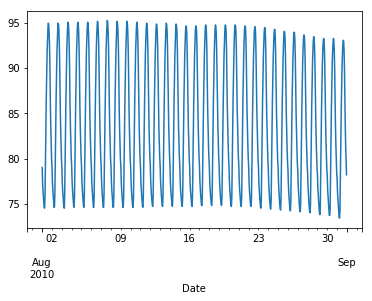

In [117]:
unsmooth.plot();

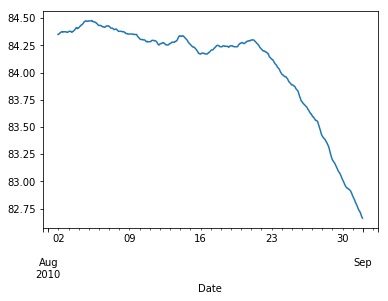

In [118]:
smoothed.plot();

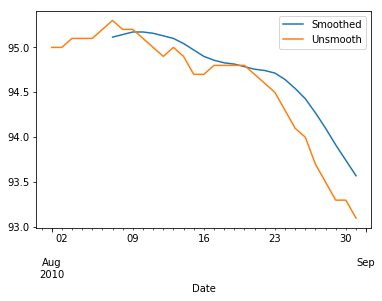

In [123]:
daily_high_smoothed= august_daily_max.rolling(window=7).mean()
august_df= pd.DataFrame({"Smoothed":daily_high_smoothed, "Unsmooth": august_daily_max})
august_df.plot();

In [179]:
austin_departure_file =os.path.join("austin_airport_departure_data_2015_july.csv")
df = pd.read_csv(austin_departure_file, sep = ",", header=10, parse_dates=["Date (MM/DD/YYYY)"], index_col= "Date (MM/DD/YYYY)")
df.head()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,,
2015-07-01,WN,103.0,N8607M,MDW,06:30,06:52,165.0,147.0,22.0,07:01,9.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,144.0,N8609A,SAN,20:55,20:50,170.0,158.0,-5.0,21:03,13.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,178.0,N646SW,ELP,20:30,20:45,90.0,80.0,15.0,20:55,10.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,232.0,N204WN,ATL,05:45,05:49,135.0,137.0,4.0,06:01,12.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0,NaN


In [180]:
df.columns = df.columns.str.strip()

In [193]:
dallas = df["Destination Airport"].str.contains("DAL")
daily_departures= dallas.resample("D").sum() #Number of flights in a particular day to dallas
daily_departures

Date (MM/DD/YYYY)
2015-07-01    10
2015-07-02    10
2015-07-03    11
2015-07-04     3
2015-07-05     9
2015-07-06    10
2015-07-07    10
2015-07-08    10
2015-07-09    10
2015-07-10    11
2015-07-11     5
2015-07-12     9
2015-07-13    10
2015-07-14    10
2015-07-15    10
2015-07-16    10
2015-07-17    11
2015-07-18     5
2015-07-19     9
2015-07-20    10
2015-07-21    10
2015-07-22    10
2015-07-23    10
2015-07-24    11
2015-07-25     5
2015-07-26     9
2015-07-27    10
2015-07-28    10
2015-07-29    10
2015-07-30    10
2015-07-31    11
dtype: int64

In [202]:
df[df["Destination Airport"]== "DAL"].resample("D").max()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,,
2015-07-01,WN,5888.0,N793SA,DAL,20:00,20:51,60.0,68.0,51.0,21:02,20.0,6.0,0.0,13.0,0.0,51.0,NaN
2015-07-02,WN,5888.0,N947WN,DAL,20:00,20:46,60.0,63.0,201.0,20:58,14.0,6.0,0.0,2.0,0.0,201.0,NaN
2015-07-03,WN,3937.0,N7718B,DAL,21:55,22:27,60.0,64.0,53.0,22:35,14.0,5.0,0.0,0.0,0.0,49.0,NaN
2015-07-04,WN,802.0,N7701B,DAL,18:40,18:36,55.0,58.0,13.0,18:44,12.0,13.0,0.0,3.0,0.0,0.0,NaN
2015-07-05,WN,5888.0,N966WN,DAL,20:00,19:59,60.0,62.0,20.0,20:08,13.0,8.0,0.0,7.0,0.0,0.0,NaN
2015-07-06,WN,5888.0,N968WN,DAL,20:00,19:59,60.0,57.0,13.0,20:08,14.0,0.0,0.0,2.0,0.0,13.0,NaN
2015-07-07,WN,5888.0,N7743B,DAL,20:00,20:45,60.0,59.0,51.0,20:54,14.0,0.0,0.0,0.0,0.0,50.0,NaN
2015-07-08,WN,5888.0,N959WN,DAL,20:00,19:56,60.0,59.0,64.0,20:08,15.0,46.0,0.0,60.0,0.0,0.0,NaN
2015-07-09,WN,5888.0,N950WN,DAL,20:00,20:00,60.0,60.0,8.0,20:08,13.0,0.0,0.0,0.0,0.0,0.0,NaN


In [204]:
df[df["Destination Airport"]== "DAL"].resample("D").max()["Scheduled Departure Time"]

Date (MM/DD/YYYY)
2015-07-01    20:00
2015-07-02    20:00
2015-07-03    21:55
2015-07-04    18:40
2015-07-05    20:00
2015-07-06    20:00
2015-07-07    20:00
2015-07-08    20:00
2015-07-09    20:00
2015-07-10    21:55
2015-07-11    20:45
2015-07-12    20:00
2015-07-13    20:00
2015-07-14    20:00
2015-07-15    20:00
2015-07-16    20:00
2015-07-17    21:55
2015-07-18    20:45
2015-07-19    20:00
2015-07-20    20:00
2015-07-21    20:00
2015-07-22    20:00
2015-07-23    20:00
2015-07-24    21:55
2015-07-25    20:45
2015-07-26    20:00
2015-07-27    20:00
2015-07-28    20:00
2015-07-29    20:00
2015-07-30    20:00
2015-07-31    21:55
Freq: D, Name: Scheduled Departure Time, dtype: object

In [221]:
#Check how many times a single flight number was departed
df[df["Destination Airport"]== "DAL"].resample("D").max()["Flight Number"].value_counts()

5888.0    26
2294.0     3
802.0      1
3937.0     1
Name: Flight Number, dtype: int64